# Task Description

We have a list of customers with different features. The target of the document is to divide customers into different segments. Having those, we can create different marketing campaigns for every group and increase our income

# 1. Import needed libraries 

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# 2. Import and preprocess data

In [14]:
X = pd.read_csv('customer_list.csv')
X.head(), X.shape

(   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
 0           1    Male   19                  15                      39
 1           2    Male   21                  15                      81
 2           3  Female   20                  16                       6
 3           4  Female   23                  16                      77
 4           5  Female   31                  17                      40,
 (200, 5))

We have additional column CustomerID. It should be dropped not to effect on the result of clusterization

In [15]:
X.drop('CustomerID', axis=1, inplace=True)
X.shape

(200, 4)

Describe the dataset

In [16]:
X.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


Make additional preparation to work with data:
- columns names "Annual Income (k$)" and "Spending Score (1-100)" are too long. Change those names
- Make mapping for "Gender" column with numbers

In [17]:
# Change columns names
X=X.rename(columns = {'Annual Income (k$)':'Income', 'Spending Score (1-100)':'Score'})
# Map Gender column 
X['Gender'] = X['Gender'].map({'Male':1, 'Female':2})

In [18]:
X.head()

,Gender,Age,Income,Score
0,1,19,15,39
1,1,21,15,81
2,2,20,16,6
3,2,23,16,77
4,2,31,17,40


# 3. Distribution for data

Create plot distribution for each feature

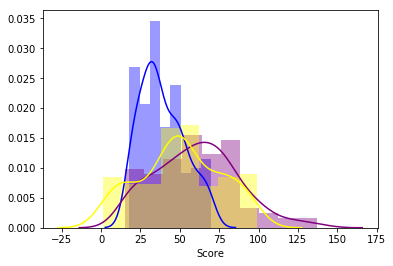

In [23]:
# Distribution for age:
plot_income = sns.distplot(X["Age"], color = 'blue')
# Distribution for income:
plot_spend = sns.distplot(X["Income"], color = 'purple')
# Distribution for score:
plot_spend = sns.distplot(X["Score"], color = 'yellow')

# 4. Select the optimal number of classes

We use Elbow method for it

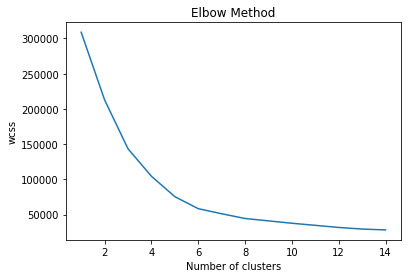

In [26]:
# Optimal number of classes
wcss = []
for i in range(1,15):
    km=KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(X)
    wcss.append(km.inertia_)
plt.plot(range(1,15),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

We see that with a number of clusters 5 or 6, decreasing dispersion is slowing down. Probably, 5 or 6 should be the optimal number of clusters

# 5. Train the model

Firstly, we need to make the composition. We have 4 features:
- Gender
- Age
- Income
- Score

We should transform those in 2 features

In [29]:
from sklearn.cluster import KMeans
pca = PCA(n_components=2).fit(X)
pca_2d = pca.transform(X)
pca_2d.shape

(200, 2)

Now, we can train the model

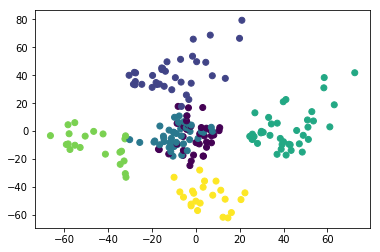

In [34]:
# Train the model with 6 clusters
kmeans = KMeans(n_clusters=6, random_state=111)
kmeans.fit(X)
plt.figure('K-means with 6 clusters')
plt.scatter(pca_2d[:, 0], pca_2d[:, 1], c=kmeans.labels_)
plt.show()

# 6. Summary

We have 5 clusters our customers can be divided